In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
train = pd.read_csv('ccleaned.csv')
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019-01-01,1,0.000167,0.713172,0.000102,0.223929,24.939440,...,5566.222019,54826.032616,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874,86.051700
1,ID_-23.73_28.77_2019_2,-23.73,28.77,2019-01-01,2,-0.000155,0.812910,-0.000137,0.080281,16.624162,...,3711.511365,68491.753342,3034.461661,12.218664,0.244987,4.708856,42.586683,-89.904314,22.773246,88.875670
2,ID_-23.73_28.77_2019_3,-23.73,28.77,2019-01-01,3,-0.000065,0.860306,-0.000062,0.161050,-13.237244,...,2136.385189,78967.739548,1433.482587,6.062737,0.245102,76.060628,34.737544,-83.595254,17.437300,91.723114
3,ID_-23.73_28.77_2019_4,-23.73,28.77,2019-01-01,4,0.000152,0.422284,0.000087,0.046504,-13.534653,...,3841.853018,64592.806769,2878.512917,6.388233,0.210904,75.912368,60.294490,-71.896728,11.977818,92.883870
4,ID_-23.73_28.77_2019_5,-23.73,28.77,2019-01-01,5,0.000024,1.004578,0.000028,0.214246,-13.475718,...,1295.688171,86804.025391,1094.665344,9.206252,0.261103,-13.346079,50.194493,-77.462082,24.374270,94.878330


# Feature Engineering

<Axes: >

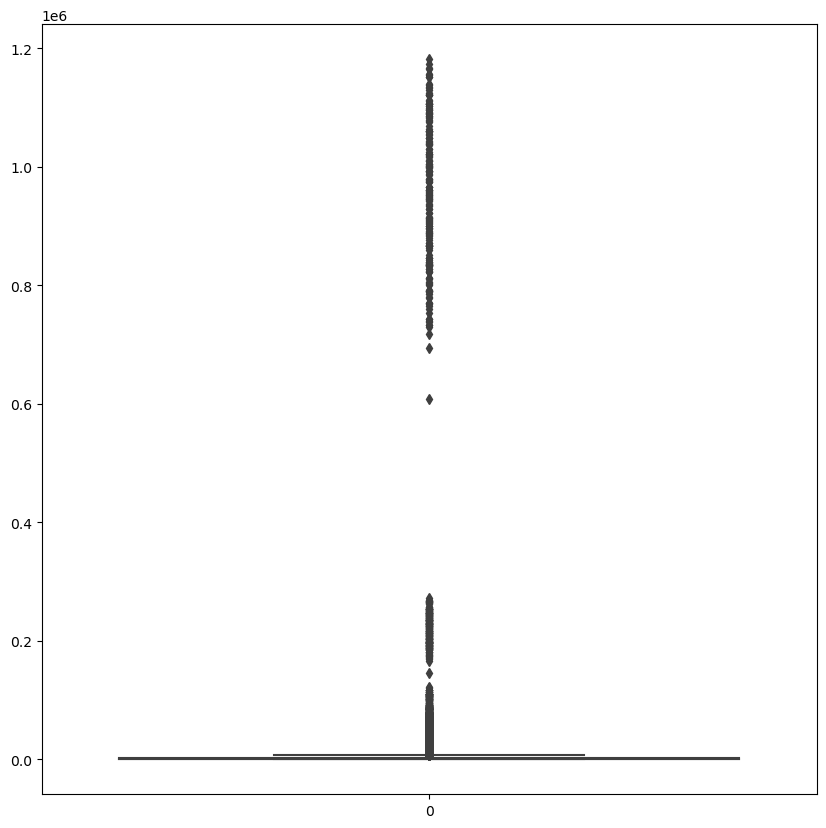

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(train['emission'])

In [3]:
train['emission'].describe()

count    7.400500e+04
mean     7.891061e+03
std      5.257160e+04
min      4.806346e-02
25%      1.545472e+02
50%      7.231359e+02
75%      2.773029e+03
max      1.181701e+06
Name: emission, dtype: float64

In [44]:
# Removing outliers using IQR
Q1 = train['emission'].quantile(0.25)
Q3 = train['emission'].quantile(0.75)
IQR = Q3 - Q1
train = train[~((train['emission'] < (Q1 - 1.5 * IQR)) |(train['emission'] > (Q3 + 1.5 * IQR)))]
train['emission'].describe()

count    61527.000000
mean       964.369212
std       1353.179602
min          0.048063
25%         99.304445
50%        473.182830
75%       1157.188200
max       6697.974000
Name: emission, dtype: float64

<Axes: >

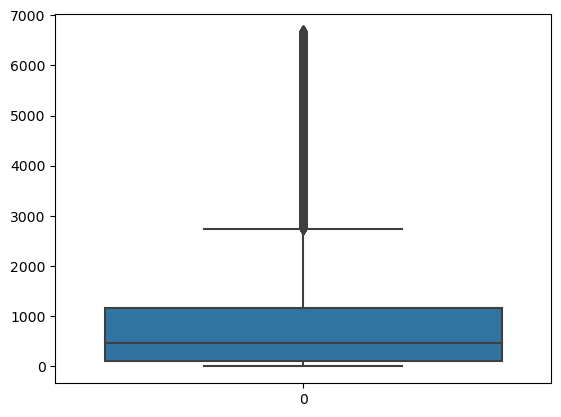

In [57]:
sns.boxplot(train['emission'])

In [45]:
test = pd.read_csv('Test.csv')

In [46]:
# Merge columns based on title similarity
def sulphur(df):
    for col in df.columns:
        if 'SulphurDioxide' in col:
            df['SulphurDioxide'] = df[col] # create new column by merging similar columns
            # round off the values to 2 decimal places
            df['SulphurDioxide'] = df['SulphurDioxide'].apply(lambda x: round(x, 2))
            # drop the merged columns
            df.drop(col, axis=1, inplace=True)
    return df

sulphur(train)
sulphur(test)

def nitrogen(df):
    for col in df.columns:
        if 'NitrogenDioxide' in col:
            df['NitrogenDioxide'] = df[col]
            df['NitrogenDioxide'] = df['NitrogenDioxide'].apply(lambda x: round(x, 2))
            df.drop(col, axis=1, inplace=True)
    return df

nitrogen(train)
nitrogen(test)

def carbon(df):
    for col in df.columns:
        if 'CarbonMonoxide' in col:
            df['CarbonMonoxide'] = df[col]
            df['CarbonMonoxide'] = df['CarbonMonoxide'].apply(lambda x: round(x, 2))
            df.drop(col, axis=1, inplace=True)
    return df

carbon(train)
carbon(test)

def ozone(df):
    for col in df.columns:
        if 'Ozone' in col:
            df['Ozone'] = df[col]
            df['Ozone'] = df['Ozone'].apply(lambda x: round(x, 2))
            df.drop(col, axis=1, inplace=True)
    return df

ozone(train)
ozone(test)

def formaldelhyde(df):
    for col in df.columns:
        if 'Formaldehyde' in col:
            df['Formaldehyde'] = df[col]
            df['Formaldehyde'] = df['Formaldehyde'].apply(lambda x: round(x, 2))
            df.drop(col, axis=1, inplace=True)
    return df

formaldelhyde(train)
formaldelhyde(test)

def cloud(df):
    for col in df.columns:
        if 'Cloud' in col:
            df['CloudHeight'] = df[col]
            df['CloudHeight'] = df['CloudHeight'].apply(lambda x: round(x, 2))
            df.drop(col, axis=1, inplace=True)
    return df

cloud(train)
cloud(test)

def uv(df):
    for col in df.columns:
        if 'UvAerosolIndex' in col:
            df['UvAerosolIndex'] = df[col]
            df['UvAerosolIndex'] = df['UvAerosolIndex'].apply(lambda x: round(x, 2))
            df.drop(col, axis=1, inplace=True)
    return df

uv(train)
uv(test)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,SulphurDioxide,NitrogenDioxide,CarbonMonoxide,Ozone,Formaldehyde,CloudHeight,UvAerosolIndex
0,ID_-23.53_27.47_2019_1,-23.53,27.47,2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24.51,29.51,28.38,-80.29,23.36,24.22
1,ID_-23.53_27.47_2019_2,-23.53,27.47,2019,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14.60,24.33,23.58,-21.61,13.42,23.58
2,ID_-23.53_27.47_2019_3,-23.53,27.47,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.10,23.22,21.71,4.77,16.27,21.71
3,ID_-23.53_27.47_2019_4,-23.53,27.47,2019,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,31.75,32.88,23.71,-20.08,22.79,22.60
4,ID_-23.53_27.47_2019_5,-23.53,27.47,2019,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,23.16,22.01,23.94,4.75,23.20,23.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28080,ID_-34.03_18.87_2022_45,-34.03,18.87,2022,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.25,41.46,35.66,-29.57,27.45,35.66
28081,ID_-34.03_18.87_2022_46,-34.03,18.87,2022,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,32.16,32.64,31.43,-13.92,31.38,32.16
28082,ID_-34.03_18.87_2022_47,-34.03,18.87,2022,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0,32.17,32.42,32.25,-11.78,32.62,32.25
28083,ID_-34.03_18.87_2022_48,-34.03,18.87,2022,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,36.44,36.42,36.44,-104.56,38.46,36.44


In [47]:
train['emission'] = train['emission'].apply(lambda x: round(x, 2))
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,emission,SulphurDioxide,NitrogenDioxide,CarbonMonoxide,Ozone,Formaldehyde,CloudHeight,UvAerosolIndex
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019-01-01,1,86.05,0.0,22.84,18.02,25.38,24.94,17.99,25.38
1,ID_-23.73_28.77_2019_2,-23.73,28.77,2019-01-01,2,88.88,-0.0,20.22,23.05,23.86,31.44,22.77,23.86
2,ID_-23.73_28.77_2019_3,-23.73,28.77,2019-01-01,3,91.72,-0.0,24.02,22.67,22.88,-13.24,17.44,22.88
3,ID_-23.73_28.77_2019_4,-23.73,28.77,2019-01-01,4,92.88,0.0,22.60,20.30,22.31,-11.10,11.98,22.31
4,ID_-23.73_28.77_2019_5,-23.73,28.77,2019-01-01,5,94.88,0.0,41.00,23.19,25.12,-31.32,24.37,25.12


<Axes: >

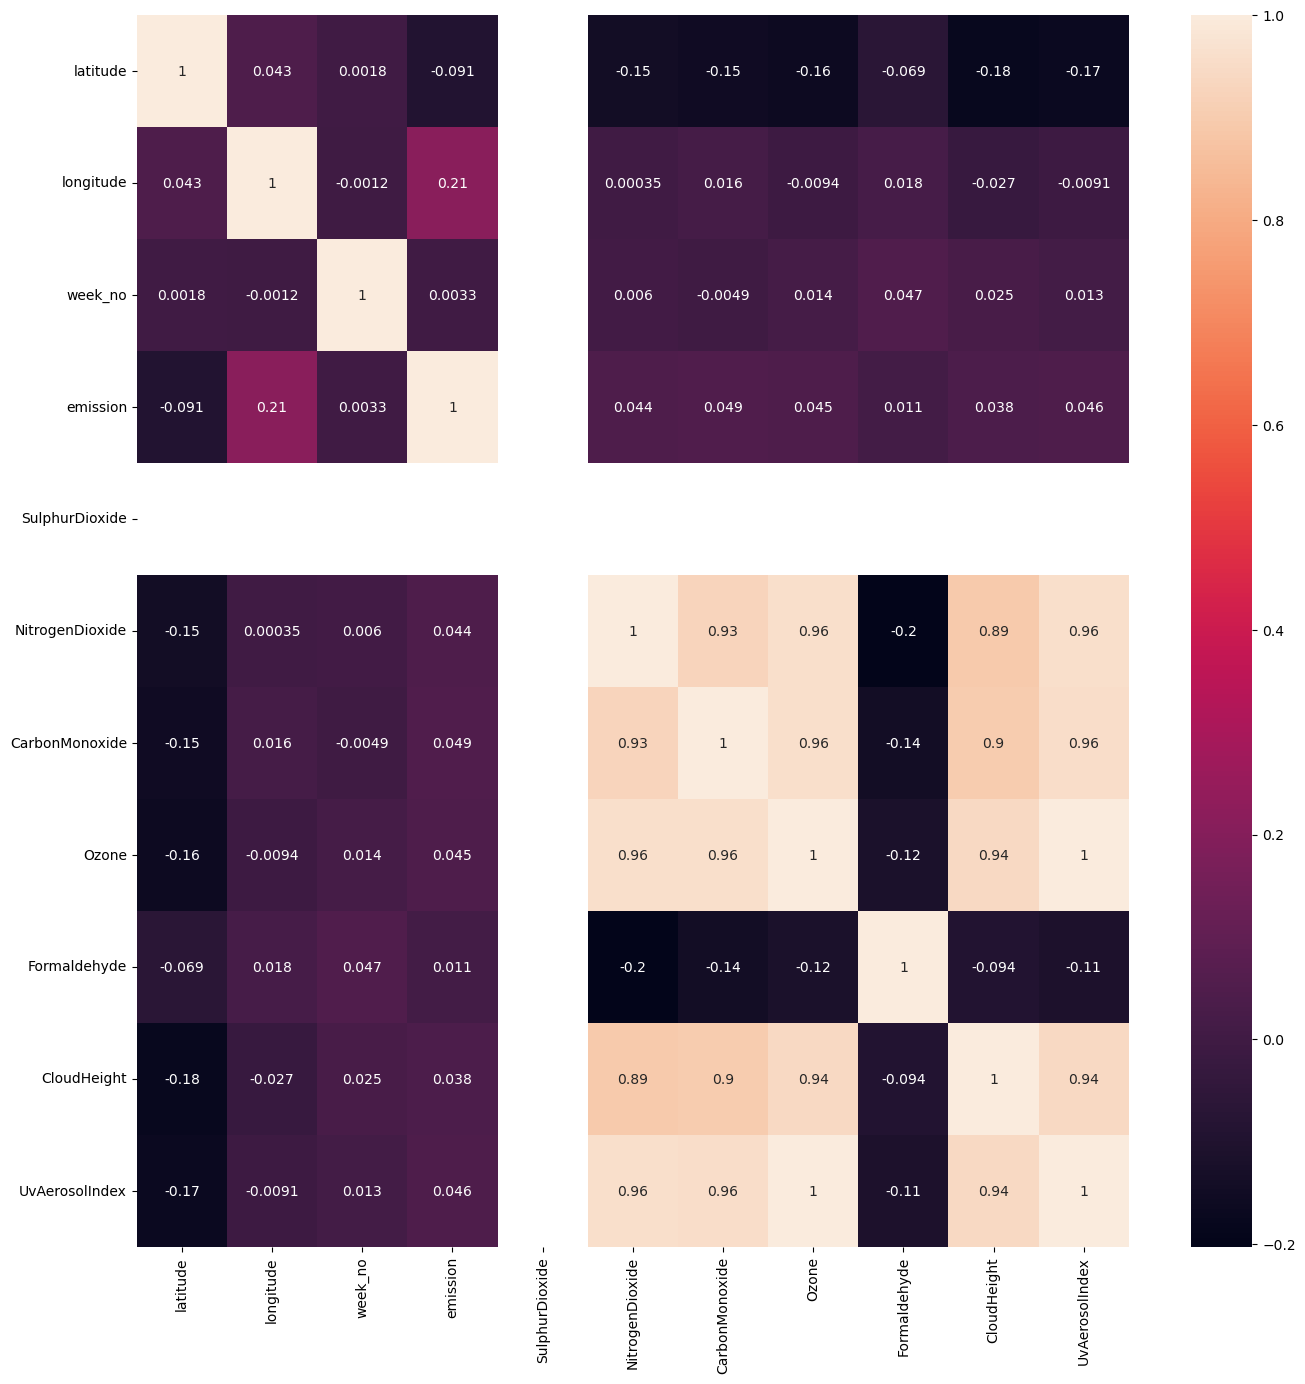

In [8]:
corr = train.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True)

In [48]:
train['emission'] = np.log(train['emission'])

# Correlation with target
train.corr()['emission'].sort_values(ascending=False)

emission           1.000000
longitude          0.532792
CarbonMonoxide     0.058633
NitrogenDioxide    0.045653
UvAerosolIndex     0.043844
Ozone              0.043512
CloudHeight        0.028639
Formaldehyde       0.020794
week_no            0.010220
latitude          -0.105733
SulphurDioxide          NaN
Name: emission, dtype: float64

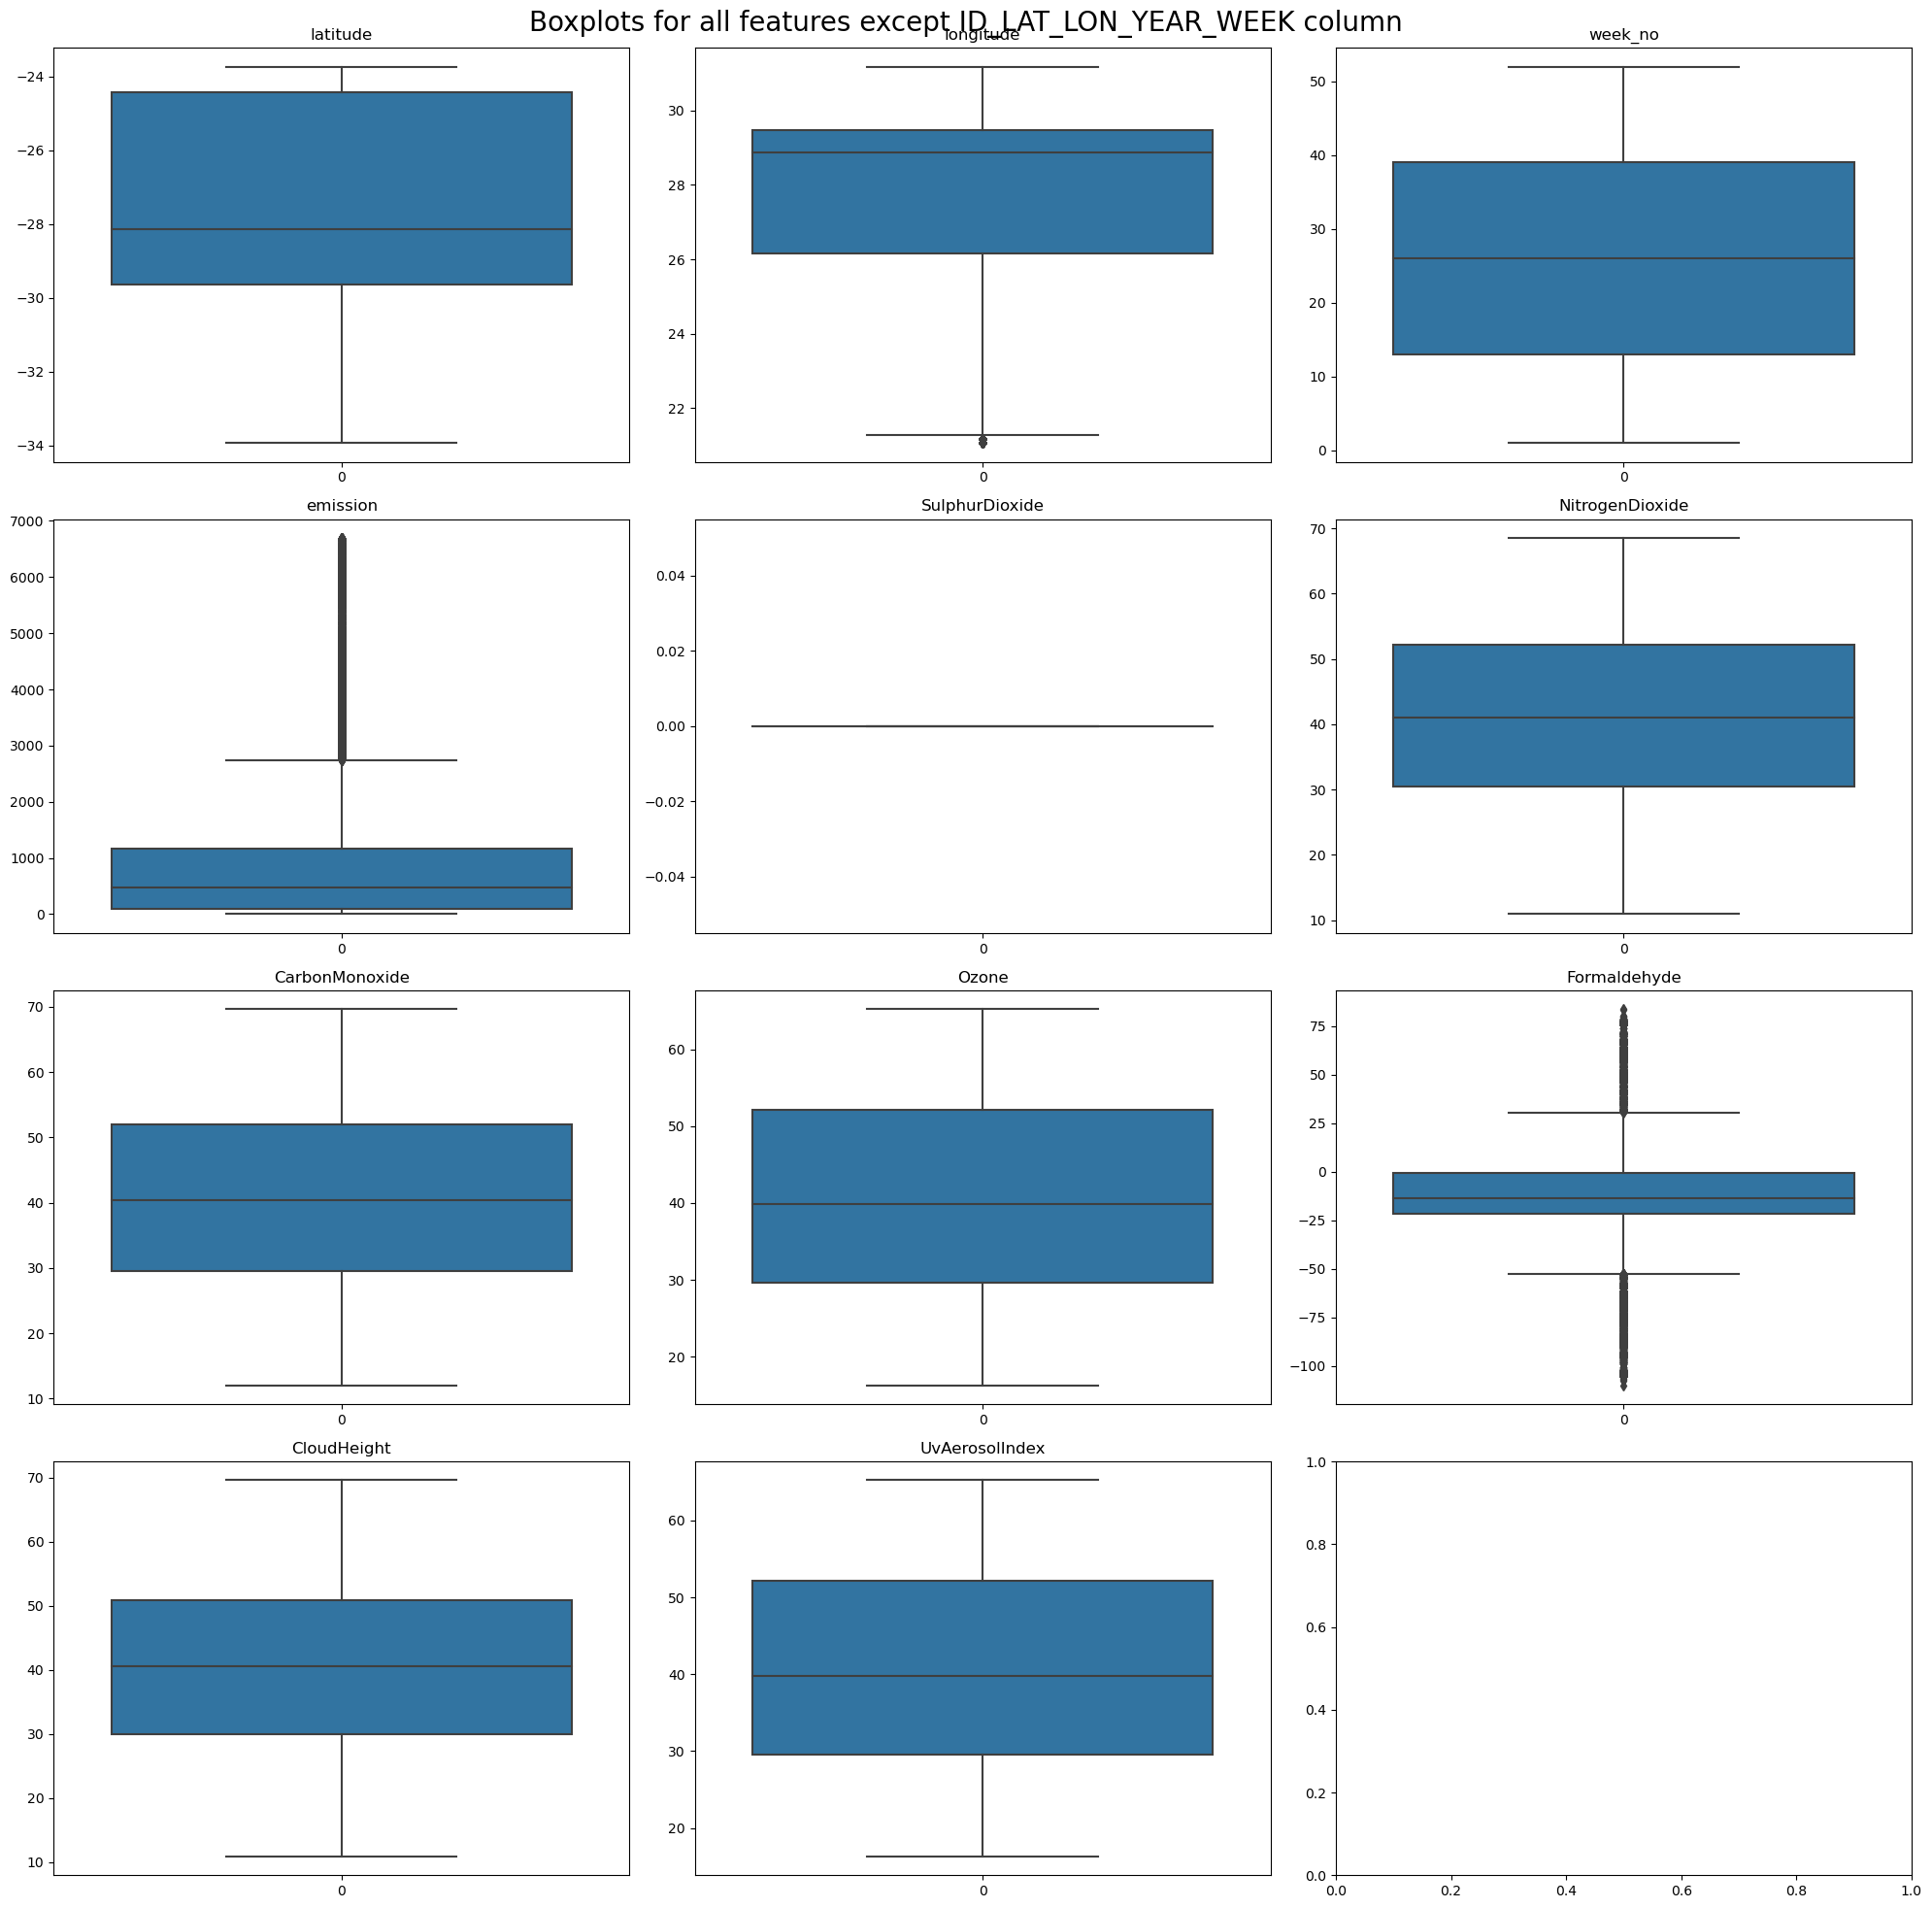

In [10]:
# Plot boxplots for all features except ID_LAT_LON_YEAR_WEEK column

def boxplot(df):
    cols = [col for col in df.columns if col not in ['ID_LAT_LON_YEAR_WEEK', 'year']]
    n_cols = len(cols)
    n_rows = (n_cols - 1) // 3 + 1
    f, ax = plt.subplots(n_rows, 3, figsize=(20,20))
    for i, col in enumerate(cols):
        sns.boxplot(df[col], ax=ax[i//3, i%3])
    # add titles for each
    for i, col in enumerate(cols):
        ax[i//3, i%3].set_title(col)
        ax[i//3, i%3].set_xlabel('')
    plt.suptitle('Boxplots for all features except ID_LAT_LON_YEAR_WEEK column', fontsize=20)
    plt.tight_layout()

boxplot(train)

In [17]:
high_corr_features = corr.index[abs(corr['emission']) > 0.02]
#high_corr_features = high_corr_features[high_corr_features.index!= 'emission']
high_corr_features = high_corr_features.drop('emission', errors='ignore')

In [18]:
high_corr_features

Index(['latitude', 'longitude', 'NitrogenDioxide', 'CarbonMonoxide', 'Ozone',
       'CloudHeight', 'UvAerosolIndex'],
      dtype='object')

In [19]:
X = train[high_corr_features]
y = train['emission']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
print(lr.score(X_test,y_test))
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(round(np.sqrt(mean_squared_error(y_test,y_pred)),2)) # RMSE

0.3066656786561681
0.3066656786561681
3.216358869271439
1.3616151102123475
1.79


The RMSE is: 0.16131445699462407
The MAE is: 0.10627081407677838
The R2 score is: 0.9943904918859261


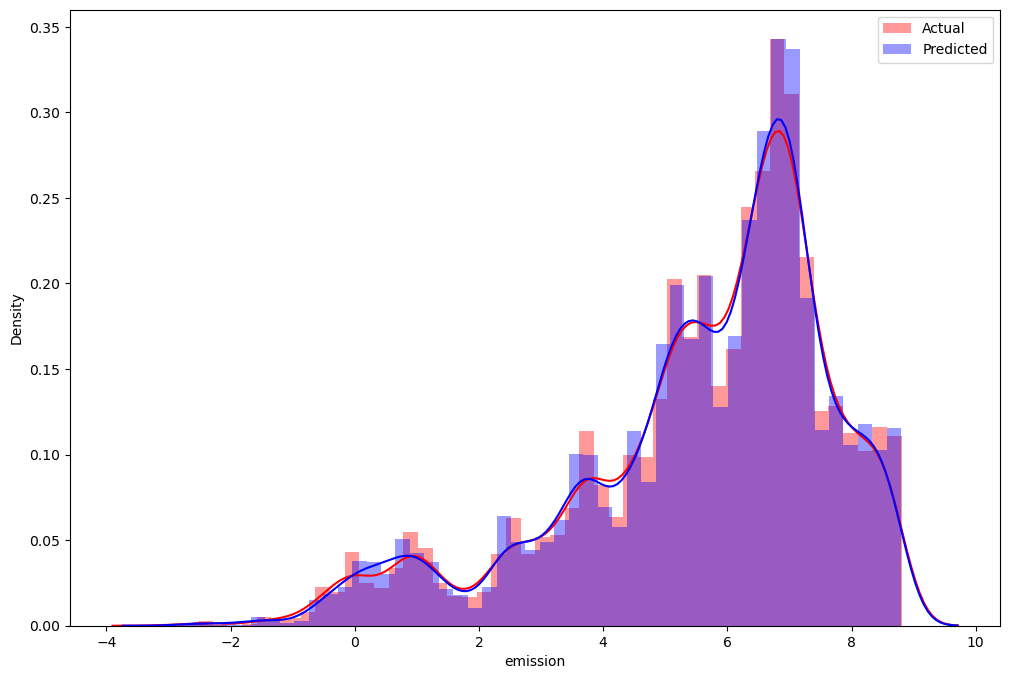

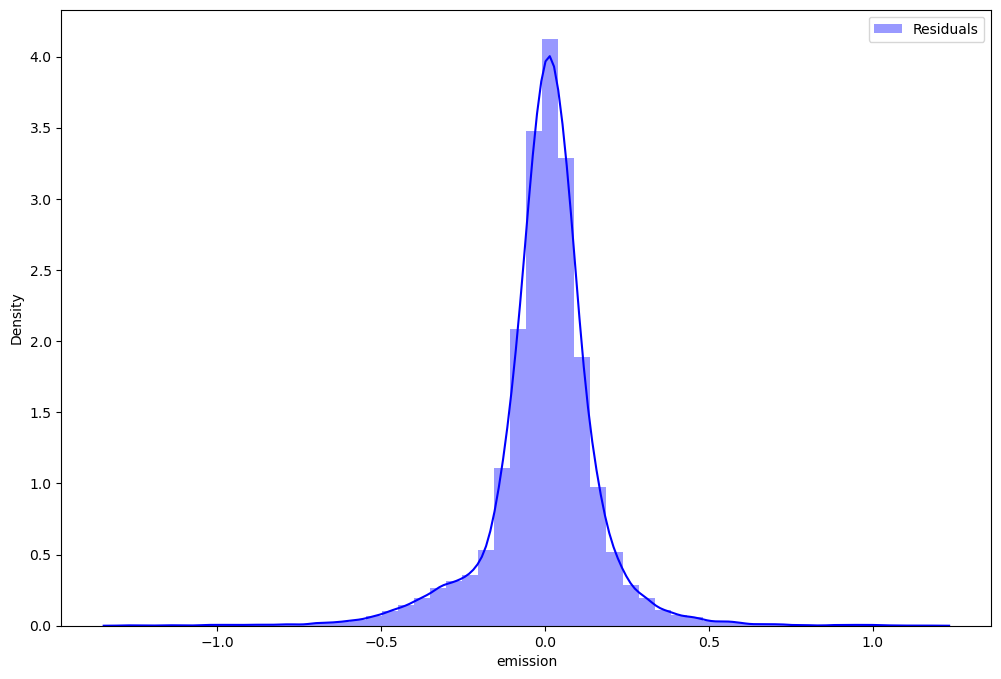

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f'The RMSE is: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'The MAE is: {mean_absolute_error(y_test, y_pred)}')
print(f'The R2 score is: {r2_score(y_test, y_pred)}')

# Visualize the predictions
plt.figure(figsize=(12, 8))
sns.distplot(y_test, color='r', label='Actual')
sns.distplot(y_pred, color='b', label='Predicted')
plt.legend()
plt.show();

# Visualize the residuals
plt.figure(figsize=(12, 8))
sns.distplot((y_test - y_pred), color='b', label='Residuals')
plt.legend()
plt.show();

In [27]:
sample = pd.read_csv('SampleSubmission.csv')

# Preprocessing test data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
test_imputed = imputer.fit_transform(test[['latitude', 'longitude', 'NitrogenDioxide', 'CarbonMonoxide', 'Ozone',
       'CloudHeight', 'UvAerosolIndex']])
preds = lr.predict(test_imputed)

sample['emission'] = preds

#sample.to_csv('submission.csv', index=False)

In [29]:
sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test['ID_LAT_LON_YEAR_WEEK'], 'emission': preds})

In [30]:
sub_file.to_csv('lamaa.csv', index=False)

# Time Series

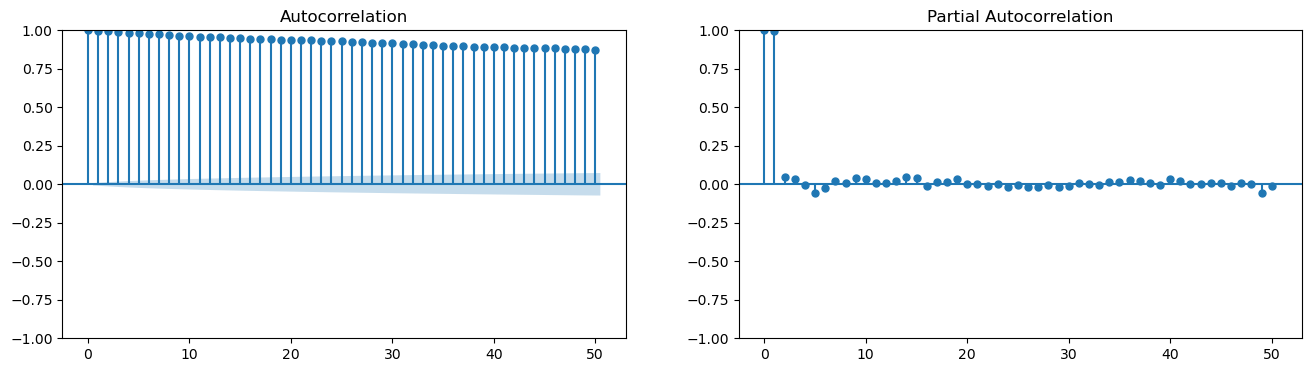

In [49]:
# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_pacf(df, lags):
    fig, ax = plt.subplots(1,2,figsize=(16,4))
    plot_acf(df, lags=lags, ax=ax[0])
    plot_pacf(df, lags=lags, ax=ax[1])
    plt.show()

plot_acf_pacf(train['emission'], 50)

<Axes: >

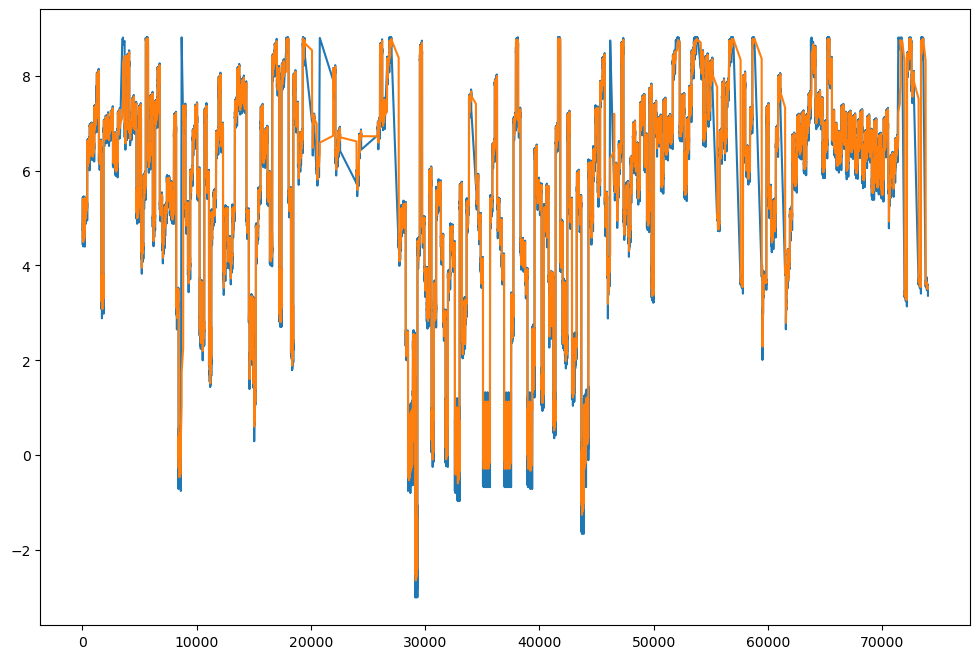

In [50]:
# Moving Average
def moving_ave(df, n):
    return df.rolling(n).mean()

train['emission'].plot(figsize=(12,8)) # original data
moving_ave(train['emission'], 12).plot(figsize=(12,8)) # 12 month moving average


In [51]:
# AD Fuller test
from statsmodels.tsa.stattools import adfuller

# Ho: It is non stationary

def adfuller_test(df):
    result = adfuller(df)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")
    
adfuller_test(train['emission'])


ADF Test Statistic : -9.664906551807602
p-value : 1.3231688912067834e-16
#Lags Used : 60
Number of Observations Used : 61466
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [52]:
train.drop(['year'], axis=1, inplace=True)

In [53]:
# Splitting the data into train and test
train['year'] = train['ID_LAT_LON_YEAR_WEEK'].apply(lambda x: x.split('_')[3])

train['year'] = train['year'].astype(int)
train = train.set_index('year')
train.index = pd.to_datetime(train.index)
train = train.sort_index()

train = train.resample('W').mean() # resample to weekly data

train = train.reset_index()

train = train[train['year'] != 2019]

# New train and test sets
test = train[train['year'] == 2019]

In [55]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['emission'], order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               emission   No. Observations:                    1
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   0.000
Date:                Wed, 05 Jul 2023   AIC                              6.000
Time:                        06:30:57   BIC                               -inf
Sample:                             0   HQIC                               nan
                                  - 1                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0        nan        nan        nan         nan         nan
ma.L1               0        nan        nan        nan         nan         nan
sigma2         1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix is singular or near-singular, with condition number    nan. Standard errors may be unstable.
"""

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(16,4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

# Forecast
fc, se, conf = model_fit.forecast(100, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['emission'], label='training')
plt.plot(test['emission'], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                    color='k', alpha=.15)   
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()